<a href="https://colab.research.google.com/github/shirsh12/-ABTN0105-Play-Store-App-Review-Analysis---Capstone-Project/blob/main/Shirsh_Verma_%5BABTN0105%5DPlay_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

####importing necessary libaries

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

####We have to datasets in our project


*   PlayStore Data.csv
*   User Reviews.csv



####Mounting the Google Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Loading the datasets

In [5]:
google_playstore_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Capstone Project I/Play Store Data.csv')

In [6]:
usrev_df= pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Capstone Project I/User Reviews.csv')

In [7]:
google_playstore_df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [8]:
usrev_df.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


####List of columns available in both our datasets

In [9]:
#playstore dataset column
google_playstore_df.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

###Detail description of columns



1.   App -Application name
2.   Category- Category the app belongs to
3.   Rating-Overall user rating of the app
4.   Reviews-Number of user reviews for the app
5.   Size-Size of the app
6.   Installs-Number of user downloads/installs for the app
7.   Type-Paid or Free
8.   Price-Price of the app
9.   Content Rating-Age group the app is targeted at — Children / Mature 21+ / Adult
10.  Genres-An app can belong to multiple genres For eg, a musical family game will belong to
11.  Last Updated- Date when was the application last updated.
12.  Current ver -Current version of the app
13.  Android ver -Which android version the app can supports.


In [10]:
#user review dataset column
usrev_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

##Detail description of columns



1.   App -Application name
2.   Translated_Review - Translation of review given by user in english language
3.   Sentiment - Sentiment of user as in Positive or Negative parameter
4.   Sentiment_Polarity- It defines the orientation of the expressed sentiments
5.   Sentiment_Subjectivity- It generally refer to personal opinion  that mostly sentiment is a public opinion and not a factual information.



#####Checking Number of columns and rows


In [11]:
print(f'The Google Playstore dataset has Rows: {google_playstore_df.shape[0]} and Columns: {google_playstore_df.shape[1]}')

The Google Playstore dataset has Rows: 10841 and Columns: 13


In [12]:
print(f'The User Review dataset has Rows: {usrev_df.shape[0]} and Columns: {usrev_df.shape[1]}')

The User Review dataset has Rows: 64295 and Columns: 5


#Data Processing and Cleanning.
#Deep diving into each aspects before removing or replacing

###Sanity Check for google Playstore ratings dataset

In [13]:
#Descriptive statistics
google_playstore_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


###In general app rating cannot be 19 its seem obviously absurd lets explore

####Using Boxplot method to visualize it

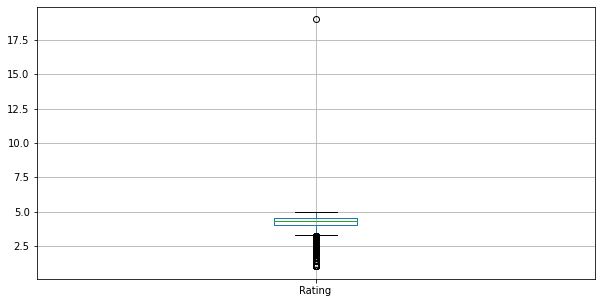

In [14]:
google_playstore_df.boxplot(figsize=(10,5)) 


####Here we can see there is a rating far away from other ratings

In [15]:
google_playstore_df[google_playstore_df['Rating'] > 5.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


###Removing 10472 due to data mismatch in the column

In [16]:
google_playstore_df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [17]:
#removing row 10472
google_playstore_df.drop(google_playstore_df.index[10472], inplace=True)


In [18]:
#finding null values
google_playstore_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

####visualizing the missing data values as below using heatmap() method

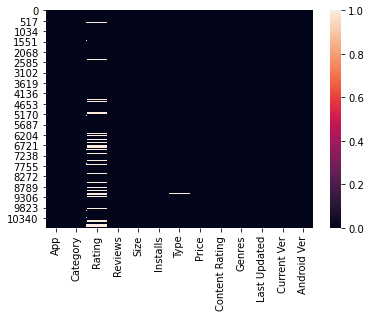

In [19]:
sns.heatmap(google_playstore_df.isnull())

#####We observed that Rating has more missing value same as above

####Checking for duplicates as a single app information can be present again

In [20]:
print(f'There are in total {google_playstore_df.duplicated().sum()} duplicate rows in this dataset')

There are in total 483 duplicate rows in this dataset


In [21]:
google_playstore_df.drop_duplicates(inplace=True)

In [22]:
#checking
google_playstore_df.duplicated().sum()

0

###Null values now after removing duplicates still we got 1465 Null rows in rating column

In [23]:

google_playstore_df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

###Checking Type of Data we have in each column

In [24]:
google_playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


####No. of installs and Price are an object type?

In [25]:
google_playstore_df['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10357, dtype: object

###Removing '+' from the values of number of installs and converting it to numeric

In [26]:
#Using map function to apply rstrip method to remove the + sign from Installs Column which is the no. of installs of an app
google_playstore_df['Installs'] = google_playstore_df['Installs'].map(lambda x: x.rstrip('+'))

####Converting the price column into int type using apply function

In [27]:
#google_playstore_df['Price'] = google_playstore_df['Price'].map(lambda x: int(x))

#####ValueError: invalid literal for int() with base 10: ($4.99)


This mean due to this $ sign Price column type is object

Removing '$' from the values of Price and converting it to numeric

In [28]:
google_playstore_df['Price'] = pd.to_numeric(google_playstore_df['Price'].str.replace('$',''))

In [29]:

#google_playstore_df['Installs'] = google_playstore_df['Installs'].map(lambda x: int(x))

ValueError: invalid literal for int() with base 10: '10,000'
we again encounter that while changing its type to int there
are some rows which have comma(,) in the Installs thus preventing it from changing

Removing ',' from the values of Installs and converting it to numeric

In [30]:
google_playstore_df['Installs'] = pd.to_numeric(google_playstore_df['Installs'].str.replace(',',''))

In [31]:
#cross checking
google_playstore_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  int64  
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [32]:
#final statistics
google_playstore_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10357,10357,8892.000000,10357,10357,1.035700e+04,10356,10357.000000,10357,10357,10357,10349,10355
unique,9659,33,NaN,6001,461,NaN,2,NaN,6,119,1377,2831,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1943,NaN,593,1526,NaN,9591,NaN,8382,842,298,1302,2379
mean,NaN,NaN,4.187877,NaN,NaN,1.415776e+07,NaN,1.030800,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.522377,NaN,NaN,8.023955e+07,NaN,16.278625,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,1.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


In [33]:
#Total apps present in the dataset after removing the duplicates
google_playstore_df['App'].shape[0]

10357

In [34]:
#No. of unique Apps in the dataset
google_playstore_df['App'].nunique()

9659

In [35]:
print(f'There are around {10357-9659} apps which are not unique!')

There are around 698 apps which are not unique!


###As we can see from the above mentioned data, there are 9659 unique apps out of 10357 .Let's check out if there data is identical or not for these 698 non unique ones 


In [36]:
google_playstore_df['App'].value_counts().reset_index().sort_values('App',ascending=False).rename(columns={'index':'App','App':'No. of Different Versions'}).head(23)

,App,No. of Different Versions
0,ROBLOX,9
1,8 Ball Pool,7
2,Bubble Shooter,6
4,Zombie Catchers,6
3,Helix Jump,6
10,Duolingo: Learn Languages Free,5
14,slither.io,5
12,Temple Run 2,5
11,Subway Surfers,5
13,Candy Crush Saga,5


In [37]:
google_playstore_df[google_playstore_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [38]:
google_playstore_df[google_playstore_df['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


##As we can see from the above dataframe, ROBLOX and 8 Ball Pool app are having identical rows with difference in Genres they both are in **Games** genres but simultaneously are available in Family and Sports. It may have happened that for the same app, the data have been scraped in different points of time or version of apps might be different for different countries like **Netflix India doesnot released 17+ Anime series though it release it in Japan and Phillipines**. App content is different from what its available in India  . Due to this the genres are different.So I have kept row of an app with maximum number of reviews, assuming it to be the latest one and neglecting the Genres factor and assuming the apps are in generalised version.(Accesible to all group of people).


###using .drop_duplicate methods to remove the multiple genres app and keeping only the one with highest reviews

#####Before that I am sorting the my datasets in ascending order 
#####this keep ='last' in .drop_duplicates method will ensure that after removing all the similar apps 
#####with different genres only the ones with higher **reviews** are remained

In [59]:
google_playstore_df.sort_values('Reviews',ascending=True,inplace=True)
google_playstore_df.drop_duplicates('App',keep='last',inplace=True) 

In [60]:
#quick check its working !!!!
google_playstore_df[google_playstore_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [61]:
google_playstore_df[google_playstore_df['App']=='8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1871,8 Ball Pool,GAME,4.5,14201891,52M,100000000,Free,0.0,Everyone,Sports,"July 31, 2018",4.0.0,4.0.3 and up


In [63]:
google_playstore_df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [62]:
#final statistics
google_playstore_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,9659,9659,8196.000000,9659,9659,9.659000e+03,9658,9659.000000,9659,9659,9659,9651,9657
unique,9659,33,NaN,5330,461,NaN,2,NaN,6,119,1377,2818,33
top,Flashlight HD LED,FAMILY,NaN,0,Varies with device,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,1,1877,NaN,593,1227,NaN,8902,NaN,7903,827,252,1055,2203
mean,NaN,NaN,4.173084,NaN,NaN,7.780208e+06,NaN,1.099299,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.536522,NaN,NaN,5.376003e+07,NaN,16.852152,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,1.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


##Handling Missing Values


1.   To avoid any outlier issue I am replacing the null values by median for my Ratings columns.
2.   Replacing the 1 null value in Type column with Type top value 'Free'.
3.  In the current version and latest version column I am dropping them because they mostly contain vague information which is not that insightfull from my perspective,so for now I am not going to use them for current EDA. Might include them in a later stage, when I have a good exposure to various kind of datasets. 



In [64]:
google_playstore_df['Rating'].fillna(np.median,inplace=True)

In [65]:
google_playstore_df['Type'].fillna('Free',inplace=True)

In [98]:
google_playstore_df.fillna('Missing',inplace=True)

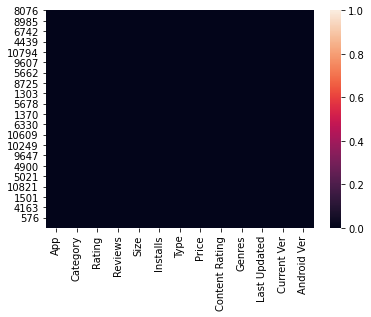

In [68]:
#quick check for null values using heatmaps
sns.heatmap(google_playstore_df.isnull())  ### no null values

#Sanity check for UserReview Dataset

In [40]:
#finding null values 
usrev_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

The user review data has almost 50%(26868 out of 64295) of its rows empty!!!


####A single app has multiple reviews so we will use groupby function to find the average Sentiment Polarity and Subjectivity

#####Before that we will check for duplicates

In [41]:
usrev_df.duplicated().sum()

33616

In [42]:
#dropping duplicates
usrev_df.drop_duplicates(inplace=True)

In [43]:
#cross checking
usrev_df.duplicated().sum()

0

In [44]:
#Actual Null values
usrev_df.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

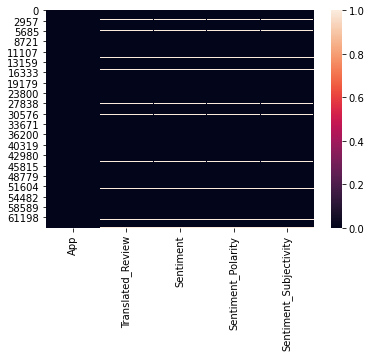

In [45]:
#using heatmap to visualize it
sns.heatmap(usrev_df.isnull())


###We observe that except App name more or less every column has missing values same as above as we got.

In [46]:
usrev_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30679 entries, 0 to 64236
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     30679 non-null  object 
 1   Translated_Review       29692 non-null  object 
 2   Sentiment               29697 non-null  object 
 3   Sentiment_Polarity      29697 non-null  float64
 4   Sentiment_Subjectivity  29697 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.4+ MB


###Data Types of all column are correct

In [70]:
#Descriptive statistics
usrev_df.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,30679,29692,29697,29697.000000,29697.000000
unique,1074,27994,3,NaN,NaN
top,Facebook,Good,Positive,NaN,NaN
freq,131,137,19015,NaN,NaN
mean,NaN,NaN,NaN,0.188836,0.490848
std,NaN,NaN,NaN,0.355672,0.266029
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.350000
50%,NaN,NaN,NaN,0.157143,0.514286
75%,NaN,NaN,NaN,0.422500,0.652500


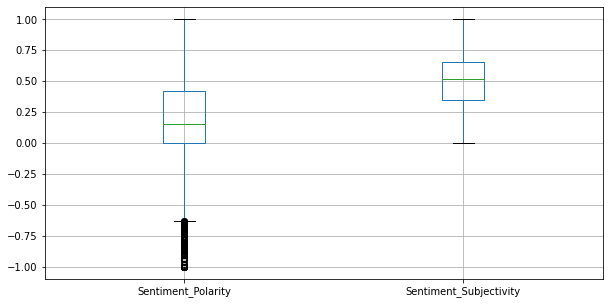

In [48]:
usrev_df.boxplot(figsize=(10,5)) 



1.   Range of Sentiment_Polarity must be -1 to 1 which we can see.
2.   Also Range of Subjectivity is 0 to 1 which is also fine
3.   We can clearly see there are total 29692 translated	reviews out of them only 27994 are unique.



In [72]:
print(f'In translated_review column {29692-27994} reviews are not unique!!')

In translated_review column 1698 reviews are not unique!!


Let's check out if there Reviews is identical or not for these 1698 non unique ones.

In [82]:
#using groupby function to find the counts of each review given to a paricular app
usrev_df['Translated_Review'].value_counts().reset_index().sort_values('Translated_Review',ascending=False).rename(columns={'index':'Translated_Review','Translated_Review':'No. of repetitions'}).head(14)

,Translated_Review,No. of repetitions
0,Good,137
1,Nice,105
2,Great,90
3,Love,81
4,Awesome,55
5,I love,55
6,Very good,51
7,I like,43
8,good,41
9,Cool,38


In [85]:
usrev_df[usrev_df['Translated_Review']=='Good'].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
40,10 Best Foods for You,Good,Positive,0.7,0.6
387,1LINE – One Line with One Touch,Good,Positive,0.7,0.6
406,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,Good,Positive,0.7,0.6
609,2RedBeans,Good,Positive,0.7,0.6
2351,A+ Mobile,Good,Positive,0.7,0.6


In [86]:
usrev_df[usrev_df['Translated_Review']=='Great'].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
200,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,Great,Positive,0.8,0.75
436,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,Great,Positive,0.8,0.75
601,2RedBeans,Great,Positive,0.8,0.75
909,4 in a Row,Great,Positive,0.8,0.75
2355,A+ Mobile,Great,Positive,0.8,0.75


##From the above two tables I have come to the conclusion that these terms ** Good , Nice, Great** are a generalised rating terms used by many Users.
## I personally also most of the times use these generalised keyword ratings for a app.
## Different people can give different kind of reviews for a same app.So in our coming analysis we can use this columns doesnot contribute a lot as we cannot get any insight from these terms. 'Good','Great' etc in general sound similar.
## Thus will mostly be focussing on **Sentiment_Polarity**	and **Sentiment_Subjectivity columns.**

In [69]:
usrev_df.isnull().sum()

App                         0
Translated_Review         987
Sentiment                 982
Sentiment_Polarity        982
Sentiment_Subjectivity    982
dtype: int64

In [87]:
usrev_df.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,30679,29692,29697,29697.000000,29697.000000
unique,1074,27994,3,NaN,NaN
top,Facebook,Good,Positive,NaN,NaN
freq,131,137,19015,NaN,NaN
mean,NaN,NaN,NaN,0.188836,0.490848
std,NaN,NaN,NaN,0.355672,0.266029
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.350000
50%,NaN,NaN,NaN,0.157143,0.514286
75%,NaN,NaN,NaN,0.422500,0.652500


##Handling Missing Values


1.   To avoid any outlier issue I am replacing the null values by median for Sentiment_Polarity  and	Sentiment_Subjectivity.
2.   Replacing the null values in Translated_Review column with  top value 'Good' and in Sentiment column by its top value 'Positive'.


In [89]:
usrev_df['Sentiment_Polarity'].fillna(np.median,inplace=True)

In [90]:
usrev_df['Sentiment_Subjectivity'].fillna(np.median,inplace=True)

In [91]:
usrev_df['Translated_Review'].fillna('Good',inplace=True)

In [92]:
usrev_df['Sentiment'].fillna('Good',inplace=True)

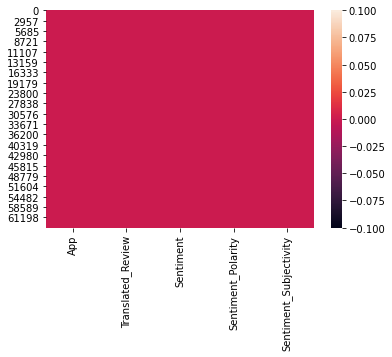

In [93]:
#checking using heatmap
sns.heatmap(usrev_df.isnull())


###creating  copies of our datasets to avoid data impurity in later stages

In [99]:
#creating a copy of our datasets to avoid data impurity in later stages
play_df = google_playstore_df.copy()
user_df = usrev_df.copy()

#Finding Insights with help of Data Visualisation Libraries on various features
Matplotlib and Seaborn

In [95]:
play_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

##Visual Representation of classification of different number of apps present on Playstore on the basis of there **respective Genres**/Category.

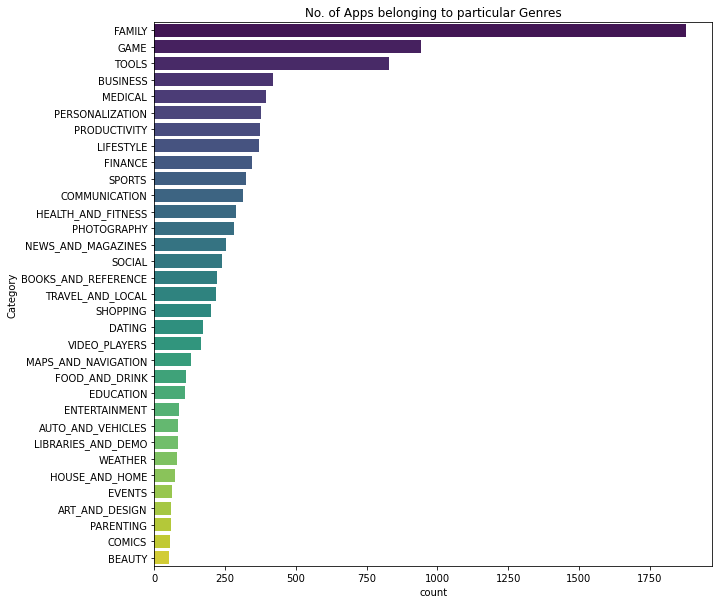

In [129]:
#using countplot from seaborn
fig,ax1=plt.subplots(figsize=(10,10))
plt.xlabel('Genres')
plt.title('No. of Apps belonging to particular Genres')
sns.countplot(y='Category',data=play_df,ax=ax1,palette='viridis',order=play_df.value_counts('Category',ascending=False).index)
plt.show()

##Thus,In the Genres, the category **'Family'** has the top position followed by **'Game'** in terms of there number of counts.